In [4]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [5]:
import matplotlib
matplotlib.style.use('publication23')

In [6]:
qrange = linspace(0, 5, 51)
omrange = linspace(-5, 5, 201)

In [7]:
pQ = Particle(0.5, qrange, omrange)
pG = Particle(1.4, qrange, omrange, stat='b')


In [8]:
T = 0.01

In [9]:
chQ = Channel(pQ, pQ, T)

XQ = array([tm.x_solve(o, 0, 0, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange])

vQ = np.sign(chQ.G)*chQ.v(0)**2
TQ = - 4*np.pi*vQ / (1 - XQ)

In [10]:
# chQ.populate_T()

(0.0, 1.5)

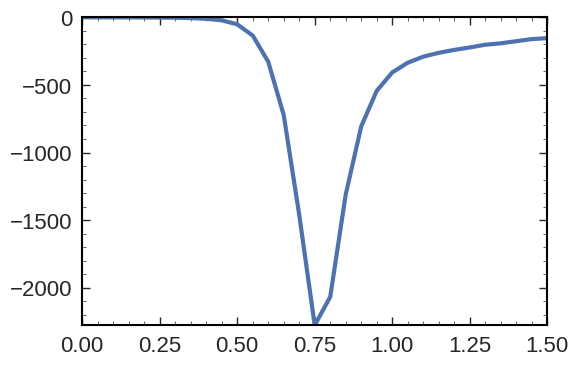

In [11]:
# plt.plot(omrange, imag(chQ.TM[:, 0]))
plt.plot(omrange, imag(TQ))
plt.xlim(0, 1.5)

In [12]:
chG = Channel(pG, pG, T)

In [13]:
chG.populate_T()

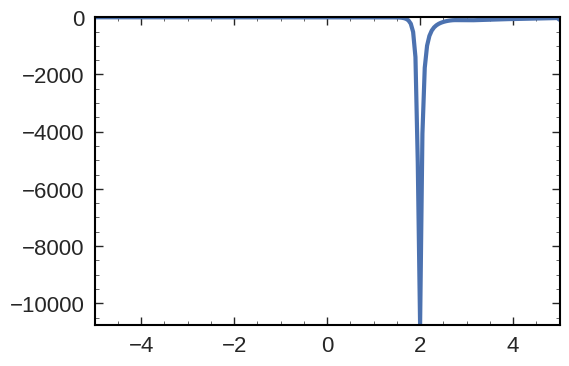

In [14]:
plt.plot(omrange, imag(chG.TM[:, 0]))

In [15]:
XG = array([tm.x_solve(o, 0, 0, T, chG.iVS[0], chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange])

In [16]:
vG = np.sign(chG.G)*chG.v(0)**2
TG = - 4*np.pi*vG / (1 - XG)

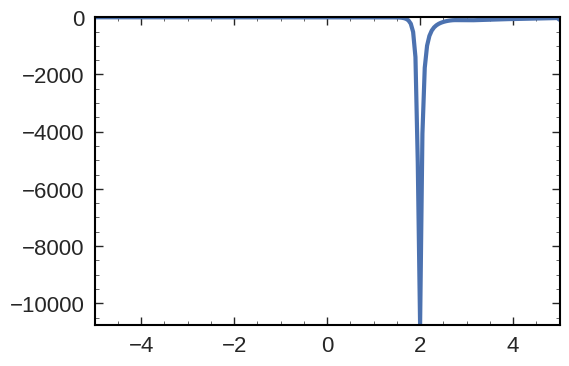

In [17]:
plt.plot(omrange, imag(TG))

In [70]:
Grange = linspace(1, 10, 25)

## Iterate over parameter space

In [16]:
screen = 4

In [17]:
mG = 1.4
mQ = 0.6

In [18]:
pQ = Particle(mQ, qrange, omrange)
pG = Particle(mG, qrange, omrange, stat='b', d=16)

In [19]:
import tqdm

In [20]:
mQQs = []
mGGs = []

In [21]:
L = 0.5
G = 5

In [22]:
Lrange = linspace(0.1, 0.4, 25)

In [23]:
mQQss = []
mGGss = []
mDss = []

chQ = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=G, L=L, screen=screen)
chG = Channel(pG, pG, T, ds=4, da=1, Fa=9./4, G=G, L=L, screen=screen)
chD = Channel(pQ, pQ, T, ds=4, da=3, Fa=1/2, G=G, L=L, screen=screen)

for L in tqdm.tqdm_notebook(Lrange):

    mQQ = 1
    mGG = 2.5
    mD = 1
    
    mQQs = []
    mGGs = []
    mDs = []
    
    for G in tqdm.tqdm_notebook(Grange, leave=0):
        for _ in [chQ, chG, chD]:
            _.G = G
            _.L = L
            _.init_iV()
        
        omrange_test = linspace(-3.5, 3.5, 1000)
        
        XQ = array([tm.x_solve(o, 0, 0, T, chQ.iV, chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange_test])
        vQ = np.sign(chQ.G)*chQ.v(0)**2
        TQ = - 4*np.pi*vQ / (1 - XQ)
        
        XG = array([tm.x_solve(o, 0, 0, T, chG.iV, chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange_test])
        vG = np.sign(chG.G)*chG.v(0)**2
        TG = - 4*np.pi*vG / (1 - XG)

        XD = array([tm.x_solve(o, 0, 0, T, chD.iV, chD.iOm, chD.iReG2, chD.iImG2, 5, 1) for o in omrange_test])
        vD = np.sign(chD.G)*chD.v(0)**2
        TD = - 4*np.pi*vD / (1 - XD)
        
        from scipy.optimize import minimize
        
        iTQ = interp1d(omrange_test, imag(TQ), kind='cubic')
        iTG = interp1d(omrange_test, imag(TG), kind='cubic')
        iTD = interp1d(omrange_test, imag(TD), kind='cubic')
        
        mQQ = minimize(iTQ, mQQ, bounds=[[0, 2]]).x
        mGG = minimize(iTG, mGG, bounds=[[0., 2.5]]).x
        mD = minimize(iTD, mGG, bounds=[[0., 2.5]]).x
    
        mQQs += [mQQ]
        mGGs += [mGG]
        mDs += [mD]
        
    
    mQQss += [mQQs]
    mGGss += [mGGs]
    mDss += [mDs]

/tmp/ipykernel_7998/1661598547.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for L in tqdm.tqdm_notebook(Lrange):


  0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_7998/1661598547.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for G in tqdm.tqdm_notebook(Grange, leave=0):


  0%|          | 0/25 [00:00<?, ?it/s]

AttributeError: 'Channel' object has no attribute 'iV'

In [24]:
0.75

0.75

In [25]:
197/150

1.3133333333333332

0.32500000000000007


Text(0.5, 1.0, '$m_Q = 0.600, m_G = 1.800$')

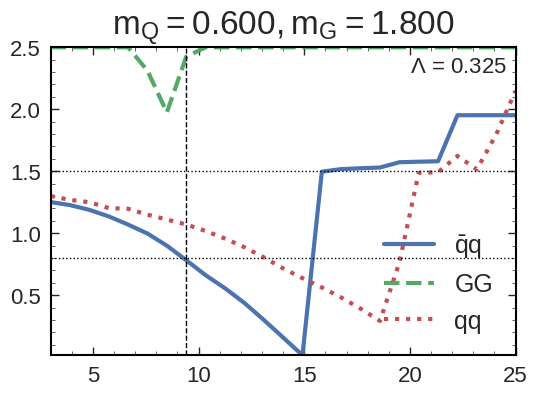

In [319]:
j = 18
plt.plot(Grange, mQQss[j], label=r'$\bar q$q')
plt.plot(Grange, mGGss[j], ls='--', label='GG')
plt.plot(Grange, mDss[j], ls=':', label='qq')

print(Lrange[j])

plt.text(20, 2.3, r'$\Lambda$ = %.3f'%Lrange[j], fontsize=16)

plt.axhline(0.8, lw=1, ls=':', c='black')
plt.axhline(1.5, lw=1, ls=':', c='black')

i_x = np.argmin((array(mQQss[j]) - 0.8)**2)
plt.axvline(Grange[i_x], lw=1, ls='--', c='black')

# plt.ylim(0.7, 2.5)


plt.legend()
plt.title(r'$m_Q = %.3f, m_G = %.3f$'%(mQ, mG))

# plt.savefig('mres_L=%.3f_mQ=%.3f_mG=%.3f.pdf'%(Lrange[j], mQ, mG), bbox_inches='tight')

In [158]:
Lrange

array([0.3 , 0.45, 0.6 , 0.75, 0.9 ])

## Test a single $\Lambda$

In [132]:
L = 0.3

In [133]:
G = 5
screen = 4

In [134]:
mG = 1.8
mQ = 0.5

In [135]:
pQ = Particle(mQ, qrange, omrange)
pG = Particle(mG, qrange, omrange, stat='b', d=16)

In [136]:
chQ = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=G, L=L, screen=screen, lmax=1)
chG = Channel(pG, pG, T, ds=4, da=1, Fa=9./4, G=G, L=L, screen=screen)
chD = Channel(pQ, pQ, T, ds=4, da=3, Fa=1/2, G=G, L=L, screen=screen) 

In [137]:
mQQ = 1
mGG = 2.5
mD = 1

mQQs = []
mGGs = []
mDs = []

TQs = []
TGs = []
TDs = []

for G in tqdm.tqdm_notebook(Grange, leave=0):
    for _ in [chQ, chG, chD]:
        _.set_Gs(G)
        _.L = L
        _.init_iV()
    
    omrange_test = linspace(0, 3.5, 1000)
    
    XQ = array([tm.x_solve(o, 0, 0, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange_test])
    vQ = np.sign(chQ.G)*chQ.v(0)**2
    TQ = - 4*np.pi*vQ / (1 - XQ)
    
    XG = array([tm.x_solve(o, 0, 0, T, chG.iVS[0], chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange_test])
    vG = np.sign(chG.G)*chG.v(0)**2
    TG = - 4*np.pi*vG / (1 - XG)

    XD = array([tm.x_solve(o, 0, 0, T, chD.iVS[0], chD.iOm, chD.iReG2, chD.iImG2, 5, 1) for o in omrange_test])
    vD = np.sign(chD.G)*chD.v(0)**2
    TD = - 4*np.pi*vD / (1 - XD)
    
    from scipy.optimize import minimize

    TQs += [TQ]
    TGs += [TG]
    TDs += [TD]
    
    iTQ = interp1d(omrange_test, imag(TQ), kind='cubic')
    iTG = interp1d(omrange_test, imag(TG), kind='cubic')
    iTD = interp1d(omrange_test, imag(TD), kind='cubic')

    
    
    # mQQ = minimize(iTQ, mQQ, bounds=[[0, 2]]).x
    mQQ = omrange_test[argmin(imag(TQ))]
    # mGG = minimize(iTG, mGG, bounds=[[0, 2.5]]).x
    mGG = omrange_test[argmin(imag(TG))]
    # mD = minimize(iTD, mGG, bounds=[[0, 2.5]]).x
    mD = omrange_test[argmin(imag(TD))]
    mQQs += [mQQ]
    mGGs += [mGG]
    mDs += [mD]

  0%|          | 0/25 [00:00<?, ?it/s]

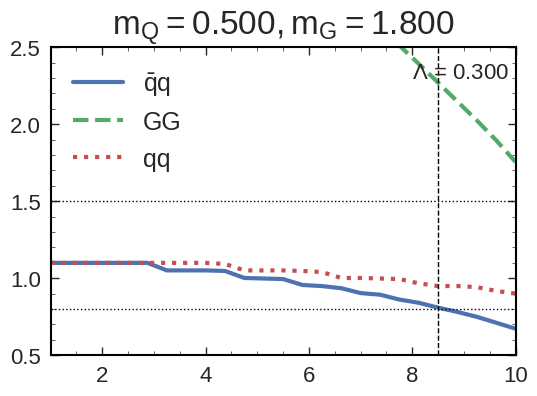

In [138]:
# j = 18
plt.plot(Grange, mQQs, label=r'$\bar q$q')
plt.plot(Grange, mGGs, ls='--', label='GG')
plt.plot(Grange, mDs, ls=':', label='qq')

# print(Lrange[j])

plt.text(8, 2.3, r'$\Lambda$ = %.3f'%L, fontsize=16)

plt.axhline(0.8, lw=1, ls=':', c='black')
plt.axhline(1.5, lw=1, ls=':', c='black')

i_x = np.argmin((array(mQQs) - 0.8)**2)
plt.axvline(Grange[i_x], lw=1, ls='--', c='black')

plt.ylim(0.5, 2.5)


plt.legend()
plt.title(r'$m_Q = %.3f, m_G = %.3f$'%(mQ, mG))

plt.savefig('mres_L=%.3f_mQ=%.3f_mG=%.3f.pdf'%(L, mQ, mG), bbox_inches='tight')

In [87]:
L

0.4

In [86]:
Grange[i_x]

6.625

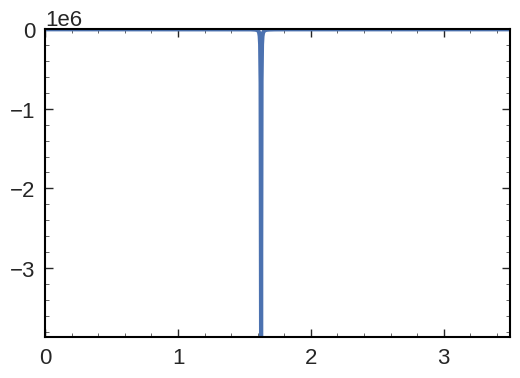

In [66]:
plt.plot(omrange_test, imag(TGs[i_x]))

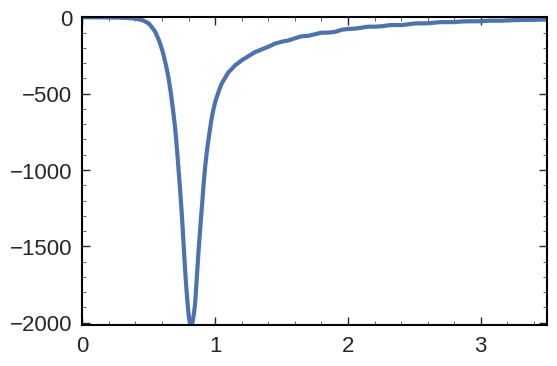

In [88]:
plt.plot(omrange_test, imag(TQs[i_x]))

In [71]:
chQ.set_Gs(12)
chQ.init_iV()

In [72]:
chQ.populate_T()

(0.0, 3.5)

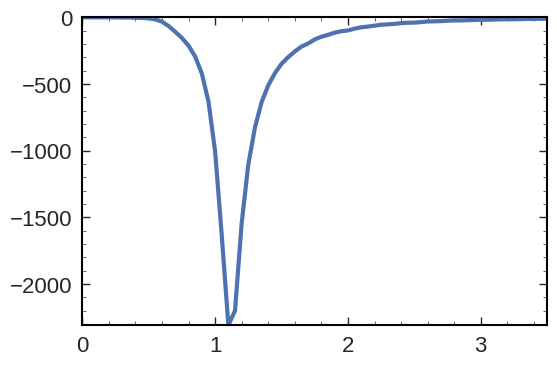

In [73]:
plt.plot(omrange, imag(chQ.TM[:, 0]))
plt.xlim(0, 3.5)

In [74]:
iOm = tm.Interpolator(qrange, pQ.om0(qrange), 'linear')

In [77]:
ImS = array([chQ.func(o, 1e-3, 0.2, chQ.iImT, pQ.R, iOm, iOm) for o in omrange])

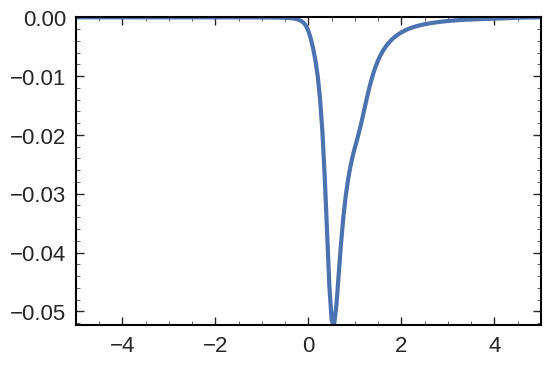

In [78]:
plt.plot(omrange, ImS)

In [45]:
iTQ = interp1d(omrange_test, imag(TQs[13]), kind='cubic')


In [46]:
minimize(iTQ, 0.05, bounds=[[0, 2]]).x

array([0.75317745])

In [ ]:
plt.plot(omrange_test, imag(TQs[15]))

# P-wave resonance in the vacuum

In [139]:
chQ_P = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=8, L=L, screen=screen, lmax=1, G1=11)

In [140]:
chQ_P.populate_T()

(0.0, 2.0)

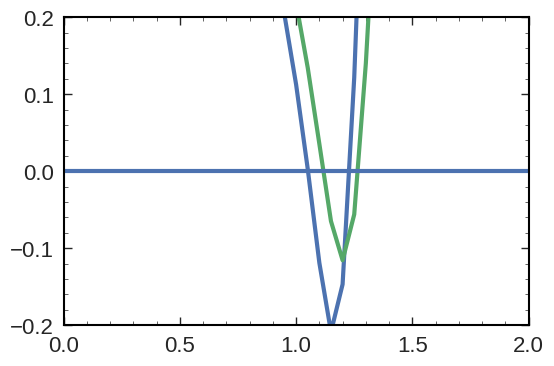

In [149]:
plt.plot(omrange, 1 - chQ_P.XS[0][:, 0])
plt.plot(omrange, 1 - chQ_P.XS[1][:, 0])
plt.axhline(0)

plt.ylim(-0.2, 0.2)

plt.xlim(0, 2)

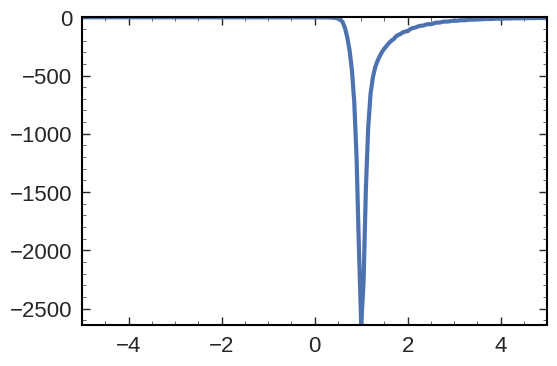

In [132]:
plt.plot(omrange, imag(chQ_P.TMS[0][:, 0]))

In [ ]:
rp = real(chQ_P.XS[1][:, 0])

iEqX = interp1d(omrange, 1 - rp)

wh = where(np.gradient(rp) < 0)

uplim = omrange[wh[0][-1]]

minimize(lambda z: iEqX(z)**2, .9, bounds=[[0, uplim]])